In [76]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix 
import seaborn as sns
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Load data and take a look at some of the high level stats 

In [77]:
full_df = pd.read_csv('bank_marketing.csv')
full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [78]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [79]:
full_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [80]:
full_df.describe(include=[np.object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


#### An actual date field might be useful 

In [81]:
# create a proper date field. we need to add a year, so lets make an assumption that this is 1 year of data (2018)

full_df['year'] = '2018'
full_df['year'] = full_df['year'].astype(int)

# will need to convert month from (mmm) to numeric, so we create a dictionary and map it back to the month column.

month_to_num = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
full_df['month'] = full_df['month'].map(month_to_num)

#finally we convert the 3 column into one date column.  
#not sure why but this would break if the columns were not labelled like this?

full_df['date']=pd.to_datetime(full_df[['year','month','day']])

### Step 1: Take a closer look at variables  

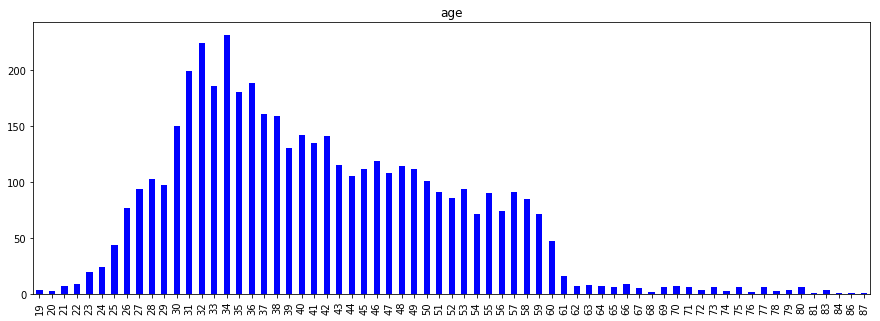

In [82]:
# distribution of age
full_df['age'].value_counts().sort_index().plot(kind='bar',figsize=(15,5),colormap='winter',title='age')

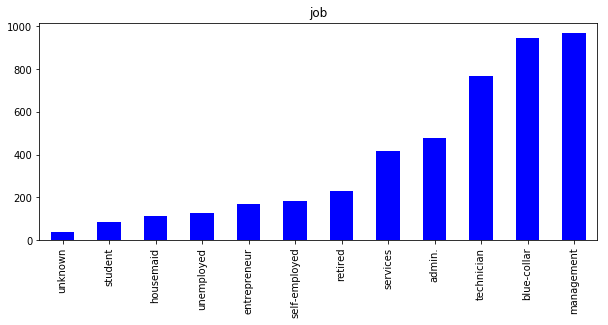

In [127]:
full_df['job'].value_counts().sort_values().plot(kind='bar',colormap='winter',figsize=(10,4),title='job')

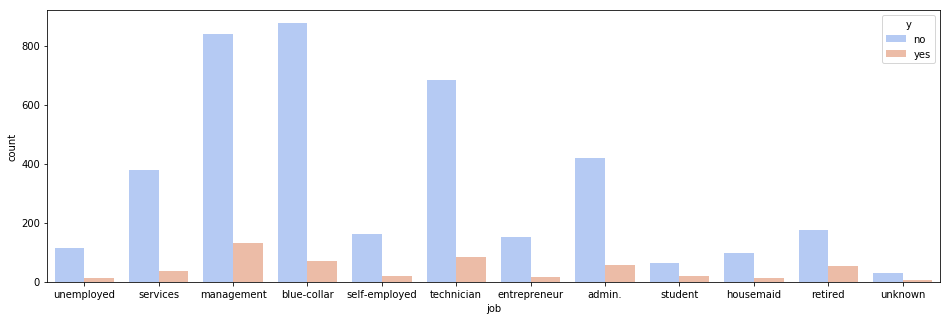

In [139]:
plt.figure(figsize=(16,5))
sns.countplot(x='job',hue='y',data=full_df,palette='coolwarm')

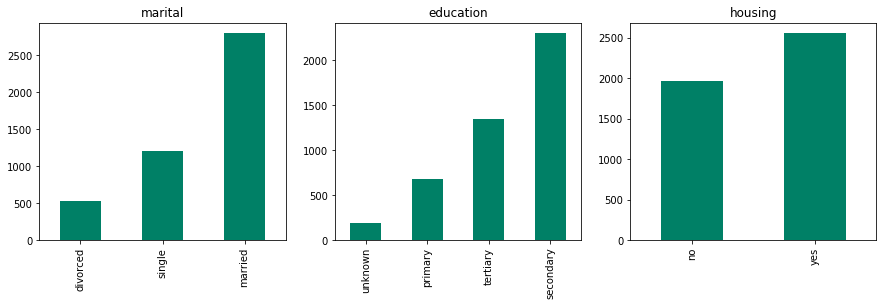

In [84]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
full_df['marital'].value_counts().sort_values().plot(ax=axes[0],kind='bar',colormap='summer',title='marital')
full_df['education'].value_counts().sort_values().plot(ax=axes[1],kind='bar',colormap='summer',title='education')
full_df['housing'].value_counts().sort_values().plot(ax=axes[2],kind='bar',colormap='summer',title='housing')

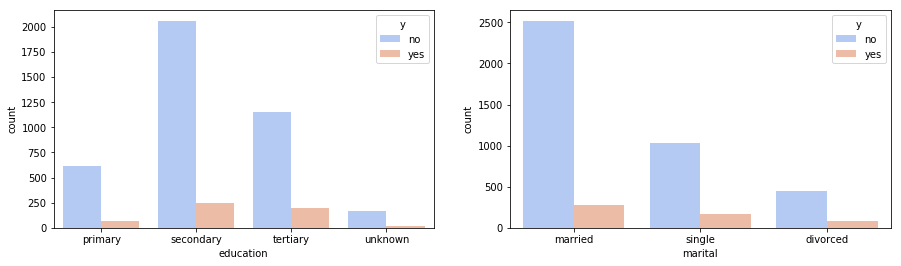

In [141]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x='education',hue='y',data=full_df,palette='coolwarm',ax=axes[0])
sns.countplot(x='marital',hue='y',data=full_df,palette='coolwarm',ax=axes[1])

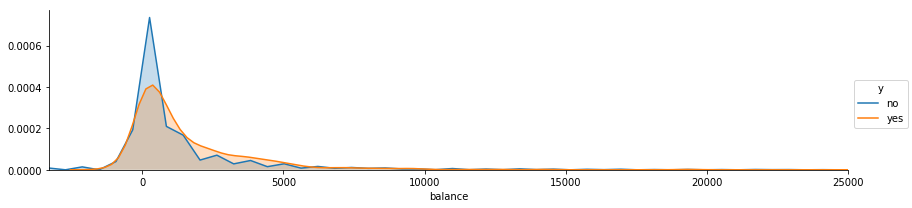

In [65]:
# use seaborn charting to take a look at the distribution of 'balance' and whether client agreed to promotion 
facet=sns.FacetGrid(full_df, hue='y',aspect=4)
facet.map(sns.kdeplot,'balance',shade= True)
facet.set(xlim=(full_df['balance'].min(), 25000)) #use a cap on max value b/c of a couple outliers
facet.add_legend()

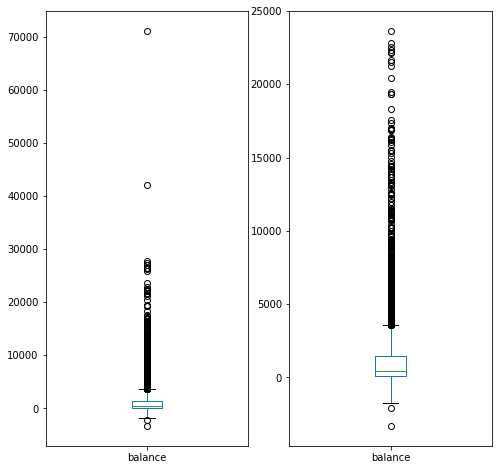

In [66]:
# a closer look at 'balance' using boxplot. first 1 no cap to see outlier and chart two with a 25k cap
fig, axes = plt.subplots(1,2,figsize=(8,8))
full_df['balance'].plot(ax=axes[0],kind='box')
subset=full_df.loc[full_df['balance']<=25000]
subset['balance'].plot(ax=axes[1],kind='box')

In [102]:
# again just a description of balance while playing around with excluding some outliers
balance_df = full_df['balance']
#balance_df.loc[(balance_df<=25000) & (balance_df>0)].describe()
balance_df.loc[(balance_df!=71188) & (balance_df!=42045)].describe()
#balance_df.loc[balance_df<=25000].describe()
#balance_df.loc[balance_df>25000].describe()

count     4519.000000
mean      1398.230361
std       2760.217133
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1477.000000
max      27733.000000
Name: balance, dtype: float64

In [103]:
full_df.loc[full_df['balance']<0].sort_values(by='balance')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year,date
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,5,153,1,-1,0,unknown,no,2018,2018-05-09
2398,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,7,123,6,-1,0,unknown,no,2018,2018-07-28
2538,44,management,married,secondary,no,-1746,yes,no,unknown,20,6,218,1,-1,0,unknown,no,2018,2018-06-20
856,49,technician,married,secondary,yes,-1680,yes,yes,unknown,27,6,92,4,-1,0,unknown,no,2018,2018-06-27
3584,46,blue-collar,married,secondary,no,-1400,yes,no,telephone,6,5,309,3,355,4,failure,no,2018,2018-05-06
2072,44,management,single,tertiary,no,-1313,yes,yes,cellular,15,5,104,10,-1,0,unknown,no,2018,2018-05-15
1972,42,technician,married,secondary,no,-1310,yes,yes,unknown,28,5,162,1,-1,0,unknown,no,2018,2018-05-28
2599,52,management,married,tertiary,no,-1224,yes,no,cellular,7,5,253,4,-1,0,unknown,no,2018,2018-05-07
804,40,management,married,tertiary,no,-1212,yes,no,cellular,15,5,1259,2,333,18,failure,no,2018,2018-05-15
189,56,retired,married,secondary,no,-1206,yes,no,cellular,15,6,382,2,-1,0,unknown,yes,2018,2018-06-15


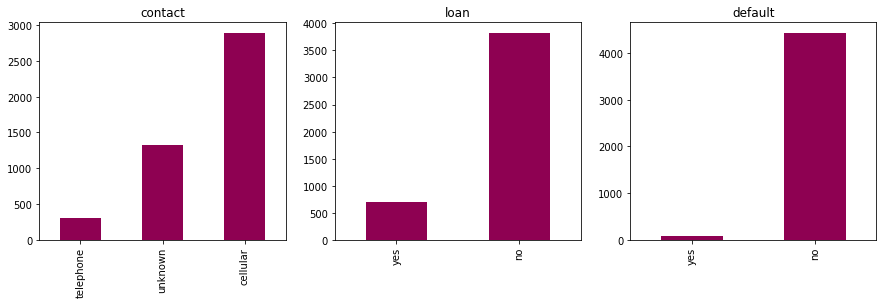

In [104]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
full_df['contact'].value_counts().sort_values().plot(ax=axes[0],kind='bar',colormap='PiYG',title='contact')
full_df['loan'].value_counts().sort_values().plot(ax=axes[1],kind='bar',colormap='PiYG',title='loan')
full_df['default'].value_counts().sort_values().plot(ax=axes[2],kind='bar',colormap='PiYG',title='default')

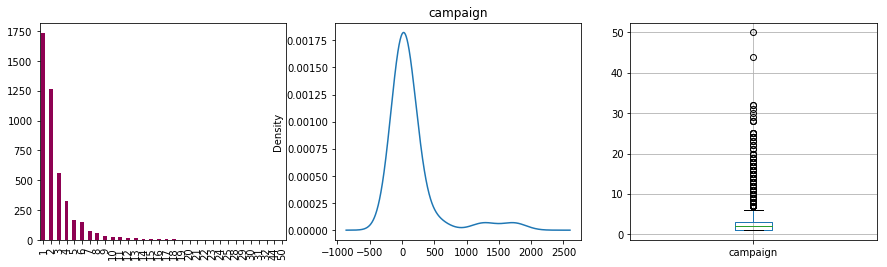

In [117]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
full_df['campaign'].value_counts().sort_index().plot(ax=axes[0],kind='bar',colormap='PiYG')
full_df['campaign'].value_counts().sort_index().plot(ax=axes[1],kind='kde',title='campaign')
full_df.boxplot(ax=axes[2],column=['campaign'])

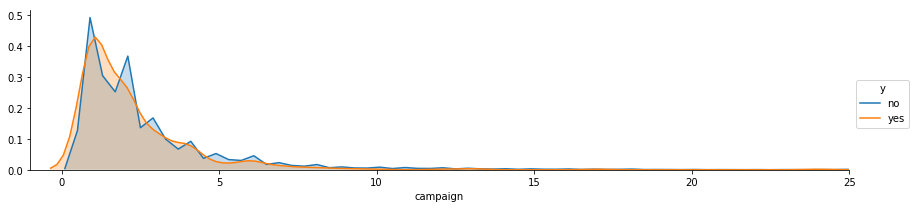

In [116]:
facet = sns.FacetGrid(full_df, hue='y',aspect=4)
facet.map(sns.kdeplot,'campaign',shade= True)
facet.set(xlim=(-1,25)) #use a cap on max value b/c of a couple outliers
facet.add_legend()

In [6]:
full_df.loc[full_df['campaign']>25].sort_values(by='campaign')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3012,36,services,married,secondary,no,-11,yes,no,cellular,30,jul,172,28,-1,0,unknown,no
3847,33,unemployed,divorced,secondary,no,385,no,no,telephone,27,aug,29,28,-1,0,unknown,no
3880,34,management,single,tertiary,no,340,yes,no,unknown,3,jun,633,28,-1,0,unknown,no
514,36,management,married,tertiary,no,-381,yes,no,cellular,31,jul,30,29,-1,0,unknown,no
1363,53,self-employed,married,tertiary,no,2627,yes,yes,unknown,16,jun,18,30,-1,0,unknown,no
3225,25,unemployed,married,secondary,no,157,yes,no,cellular,28,jul,33,31,-1,0,unknown,no
553,42,self-employed,married,tertiary,no,1932,yes,no,unknown,16,may,192,32,-1,0,unknown,no
3125,38,admin.,married,primary,no,0,yes,no,unknown,2,jun,29,32,-1,0,unknown,no
4301,49,blue-collar,married,primary,no,371,yes,no,cellular,31,jul,18,44,-1,0,unknown,no
2504,35,blue-collar,married,secondary,no,280,yes,yes,cellular,31,jul,65,50,-1,0,unknown,no


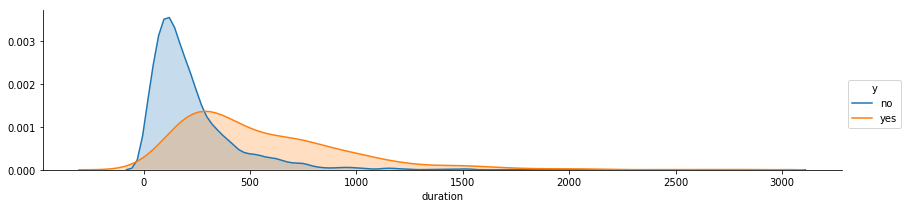

In [142]:
# duration seems to have a noticeable effect 
facet = sns.FacetGrid(full_df, hue='y',aspect=4)
facet.map(sns.kdeplot,'duration',shade= True)
facet.add_legend()

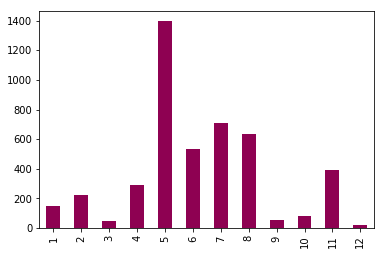

In [41]:
full_df['month'].value_counts().sort_index().plot(kind='bar',colormap='PiYG')

In [17]:
full_df['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [7]:
full_df[['education','balance']].groupby(['education'], as_index=False).mean()

,education,balance
0,primary,1411.544248
1,secondary,1196.814397
2,tertiary,1775.423704
3,unknown,1701.245989


In [161]:
full_df[['y','campaign']].groupby(['y'], as_index=False).max()

,y,campaign
0,no,50
1,yes,24


In [119]:
full_df[['job','balance']].groupby(['job'], as_index=False).sum().sort_values(by='balance',ascending=False)

,job,balance
4,management,1712154
1,blue-collar,1026563
9,technician,1022205
0,admin.,586380
5,retired,533414
7,services,460350
2,entrepreneur,276381
6,self-employed,254811
3,housemaid,233386
10,unemployed,139446


In [9]:
full_df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [152]:
full_df['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [20]:
full_df['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [44]:
full_df[['poutcome','previous']].groupby(['poutcome'], as_index=False).mean()

,poutcome,previous
0,failure,2.851020
1,other,3.385787
2,success,3.015504
3,unknown,0.000000


In [52]:
full_df[['poutcome','pdays']].groupby(['poutcome'], as_index=False).mean()

,poutcome,pdays
0,failure,243.167347
1,other,219.385787
2,success,163.713178
3,unknown,-1.000000


In [45]:
full_df[['y','campaign']].groupby(['y'], as_index=False).mean()

,y,campaign
0,no,2.862250
1,yes,2.266795


### Step 2: mapping variables

In [46]:
run_df = full_df.copy(deep=True)

In [47]:
run_df['y'] = run_df['y'].map({'yes':0, 'no':1})

run_df['marital'] = run_df['marital'].map({'married':0, 'single':1, 'divorced':2})

run_df['education'] = run_df['education'].map({'primary':0, 'secondary':1, 'tertiary':2, 'unknown':3})

run_df['housing'] = run_df['housing'].map({'yes':0, 'no':1})

run_df['contact'] = run_df['contact'].map({'telephone':0, 'cellular':1, 'unknown':2})

run_df['loan'] = run_df['loan'].map({'yes':0, 'no':1})

run_df['default'] = run_df['default'].map({'yes':0, 'no':1})

run_df['poutcome'] = run_df['poutcome'].map({'success':0, 'failure':1, 'other':2, 'unknown':3})

run_df['job'] = run_df['job'].map({'blue-collar':0, 'technician':1, 'admin.':2, 'retired':3, 'services':4, 'entrepreneur':5,
                                   'self-employed':6, 'housemaid':7, 'unemployed':8, 'student':9, 'unknown':10, 'management':11})

In [48]:
run_df = run_df.drop(['day','year'],axis=1) 

In [49]:
run_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y,date
0,30,8,0,0,1,1787,1,1,1,10,79,1,-1,0,3,1,2018-10-19
1,33,4,0,1,1,4789,0,0,1,5,220,1,339,4,1,1,2018-05-11
2,35,11,1,2,1,1350,0,1,1,4,185,1,330,1,1,1,2018-04-16
3,30,11,0,2,1,1476,0,0,2,6,199,4,-1,0,3,1,2018-06-03
4,59,0,0,1,1,0,0,1,2,5,226,1,-1,0,3,1,2018-05-05


In [50]:
corr_df = run_df.drop(['date'],axis=1) 

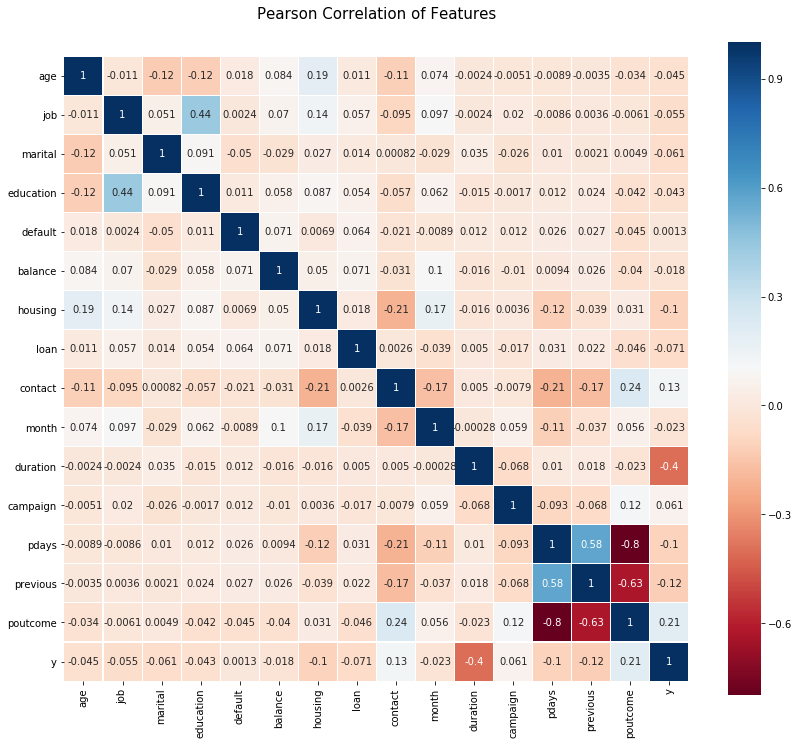

In [51]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_df.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)